
### Notes
* For ncity >8 the brute force method breaks because of computer memory/numbero of operations.
* Simulated Annealing method
    * If you notice a local minima trap, use more number of MC iterations.

In [200]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
from scipy.interpolate import griddata
import matplotlib.ticker as ticker
import scipy

#Shell environment
import os
import sys
import subprocess		# to send python variables to shell.

# Permutations
import itertools

In [8]:
# Keep the city coordinates separate here
ncity = 40 # Number of cities in between.
# Generate coordinates of each city randomly on [0,1]
city = [ [np.random.uniform(0,1)+ 1j*np.random.uniform(0,1)] for i in range(ncity) ]
city = np.array(city)

# # Same coordinates as Cody's program.
# city = []
# for i in range(ncity):
#     city.append(np.random.uniform(low=0,high=1,size=2))
# city = np.array(city)


Cities:  [[0.44182792+0.12351605j]
 [0.40610571+0.11369574j]
 [0.5936656 +0.58818812j]
 [0.2766685 +0.17066006j]
 [0.60399315+0.74083592j]]
[0.82031228]


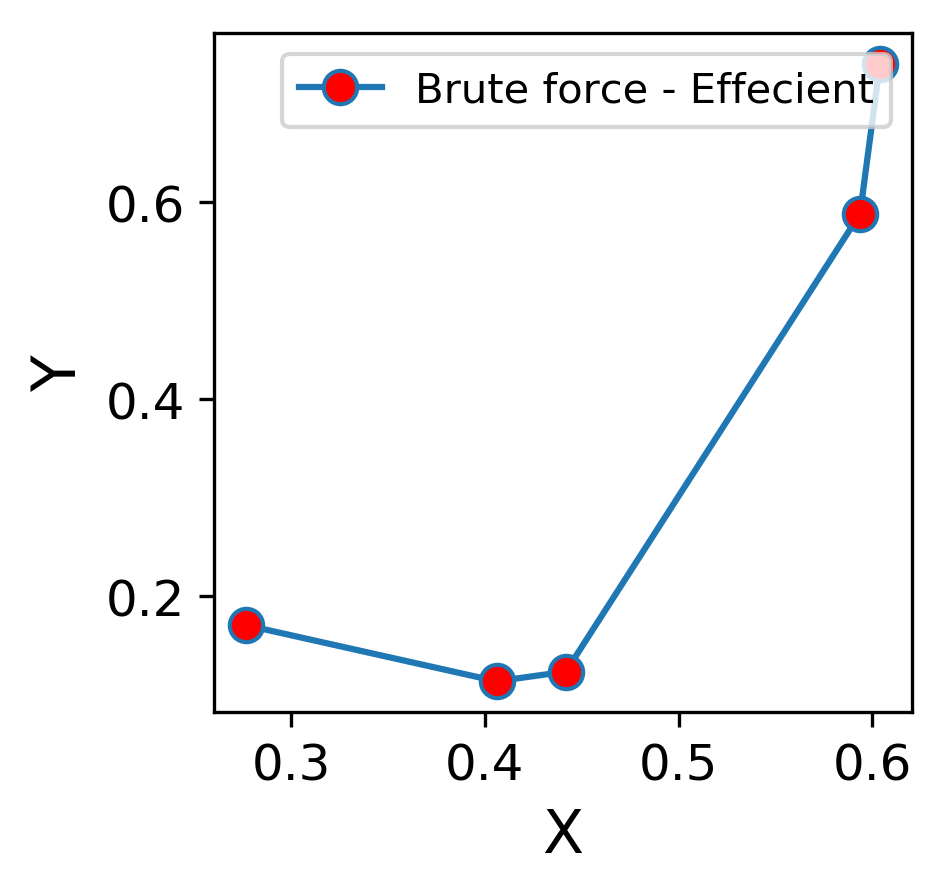

In [216]:
## Brute force - implementaion 02 - effecient.
    # We do not store paths and distances.
# ncity = 4 # Number of cities in between.

# Generate coordinates of each city randomly on [0,1]
# city = [ [np.random.uniform(0,1)+ 1j*np.random.uniform(0,1)] for i in range(ncity) ]
# city = np.array(city)
print("Cities: ",city)

### Find distance for all the paths and then find the minima.
min_path_len = 100000.0
for ipath in itertools.permutations( city ):
    path_len = 0.0
    for icity in range(1,len(city)):
        path_len += abs( ipath[icity-1] - ipath[icity] )
    if path_len < min_path_len:
        min_path_len = path_len
        min_path = np.copy(ipath)

fig, ax = plt.subplots(1,1, figsize=(3,3), dpi=300)
marksize = 8
fontl = 12

ax.plot( real(min_path), imag(min_path),'-o', markerfacecolor='r', markersize = marksize, label='Brute force - Effecient' )

ax.set_xlabel('X', fontsize = 1.2*fontl)
ax.set_ylabel('Y', fontsize = 1.2*fontl)
ax.legend( loc='upper right', frameon = 'True')
ax.tick_params(axis='both', which='major', labelsize=1.0*fontl) 
#ax.tick_params(axis='y', left='off', top='off', right='off', bottom='off', labelleft='off', labeltop='off', labelright='off', labelbottom='off', labelsize=0.4*fontl) 

fig.savefig('test.eps', bbox_inches='tight')
fig.savefig('test.pdf', bbox_inches='tight')
fig.savefig('test.jpg', bbox_inches='tight')

print(min_path_len)

Cities:  [[0.51735643+0.31747011j]
 [0.94745288+0.56055526j]
 [0.66514359+0.46790235j]
 [0.87255723+0.65181184j]
 [0.52537828+0.50991499j]]


No handles with labels found to put in legend.



 Minima distance:  [0.0010053  0.73381665]


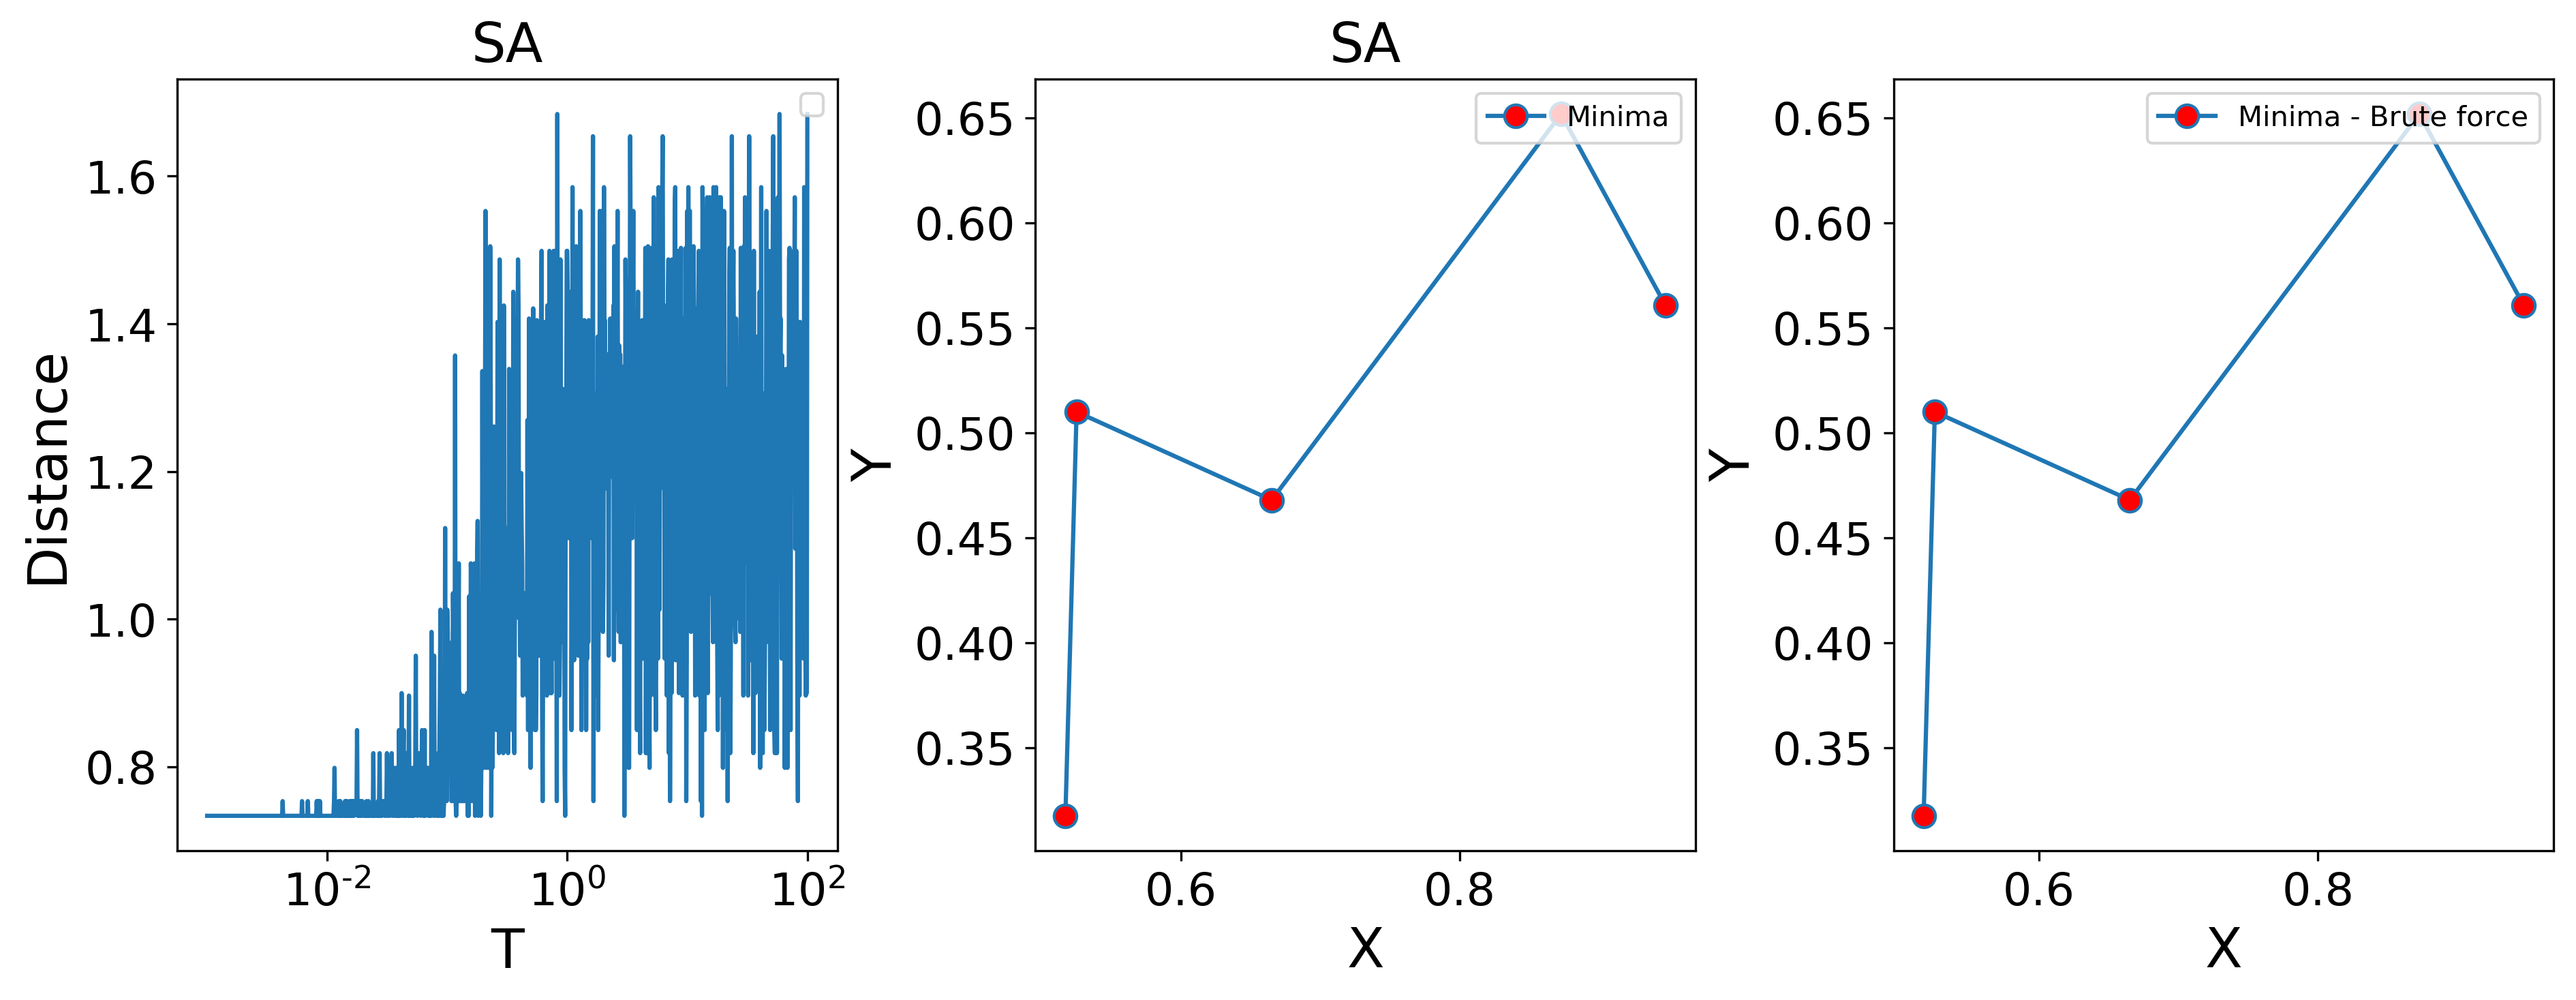

In [6]:
## Combined
from scipy.interpolate import griddata
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np

#Shell environment
import os
import sys
import subprocess		# to send python variables to shell.

# Permutations
import itertools

def PathLength(path):
    path_len = 0.0
    for icity in range(1,len(path)):
        path_len += abs( path[icity-1] - path[icity] )
    return path_len

def NewPath(path):
    _path = np.copy(path)
    i = np.random.randint(0, len(path),2)
    # Switch values at i,j index
    _path[i[0]] = path[i[1]]
    _path[i[1]] = path[i[0]]
    return _path

def MCstep(T, pathA):
    nMC = 0
#     change = 10
    while( nMC < 200 ):
        pathB = NewPath( pathA )
        change = PathLength(pathB) - PathLength(pathA)
        # Metropolis algorithm check
        coin_toss = np.random.uniform(0,1,1)
        if ( change < 0 ) or (coin_toss < np.exp( -change/T ) ) :
            pathA = np.copy(pathB)

        nMC += 1
    return pathA

# Plots
fig, ax = plt.subplots(1,3, figsize=(15,5), dpi=300)
fig.subplots_adjust(wspace=0.3, hspace=0.0)
ax = ax.ravel()
marksize = 8
fontl = 16

#####
#Cities data
ncity = 5 # Number of cities in between.
# Generate coordinates of each city randomly on [0,1]
city = [ [np.random.uniform(0,1)+ 1j*np.random.uniform(0,1)] for i in range(ncity) ]
city = np.array(city)
####

#### 
# Brute force method 
# ****** Condition is used to stop it if the number of cities is >=6.
### Find distance for all the paths and then find the minima.
min_path_len = 100000.0
for ipath in itertools.permutations( city ):
    path_len = PathLength(ipath)
    
    if path_len < min_path_len and ncity <6:
        min_path_len = path_len
        min_path = np.copy(ipath)
ax[2].plot( np.real(min_path), np.imag(min_path),'-o', markerfacecolor='r', markersize = marksize, label='Minima - Brute force' )
####

####
# Simulated annealing algorithm
# # Initial path. Just the city sequence.
print("Cities: ",city)
initial_path = [city[i] for i in range(len(city))]
initial_path = np.array(initial_path)
####

####
# Main temperature loop
TLenlist = np.array([]).reshape(0,2) # [T, Len

dT =0.99 # Not it is mul
T = 100
while( T > 0.001):
    min_path = MCstep( T, initial_path)
    TLenlist = np.vstack( (TLenlist, np.array( [T, PathLength(min_path)] ) ))
    initial_path = np.copy( min_path)
    T *= dT

print("\n Minima distance: ",TLenlist[-1])
####

# Plots
ax[0].semilogx( TLenlist[:,0], TLenlist[:,1],'-', markerfacecolor='r', markersize = marksize )
ax[1].plot( np.real(min_path), np.imag(min_path),'-o', markerfacecolor='r', markersize = marksize, label='Minima' )

for iplot in range( len(ax) ):
    ax[0].set_title('SA', fontsize = 1.2*fontl)
    ax[1].set_title('SA', fontsize = 1.2*fontl)
    
    ax[0].set_xlabel('T', fontsize = 1.2*fontl)
    ax[0].set_ylabel('Distance', fontsize = 1.2*fontl)
    ax[iplot].set_xlabel('X', fontsize = 1.2*fontl)
    ax[iplot].set_ylabel('Y', fontsize = 1.2*fontl)

    ax[iplot].legend( loc='upper right', frameon = 'True')
    ax[iplot].tick_params(axis='both', which='major', labelsize=1.0*fontl) 
    #ax[i].tick_params(axis='y', left='off', top='off', right='off', bottom='off', labelleft='off', labeltop='off', labelright='off', labelbottom='off', labelsize=0.4*fontl) 

fig.savefig('test.eps', bbox_inches='tight')
fig.savefig('test.pdf', bbox_inches='tight')
fig.savefig('test.jpg', bbox_inches='tight')

